### Import libraries and features 

In [1]:
import umap
from pynndescent import NNDescent
import sys
import numpy as np
import pandas as pd 
import tensorflow
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')
sys.path.append("/home/mindy/Documents/projects/creditCardFraud/SupervisedLearning/scripts/")

In [2]:
from util import *
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_csv("../../AnomalyDetection/processedData/TrainingData_normal.csv")
dev = pd.read_csv("../../AnomalyDetection/processedData/DevData_normal.csv")
test = pd.read_csv("../../AnomalyDetection/processedData/hold_outset_moreFraud.csv")

In [4]:
training,testing = train_test_dfs(train,dev,test,"Class",0.1,1988)

### Create manifold features 

In [5]:
X, y = training.drop("Class",axis=1), training.Class

In [29]:
feature_map = umap.UMAP().fit(X,y)

In [30]:
train_embed = feature_map.transform(X)
test_embed = feature_map.transform(testing.drop("Class",axis=1))

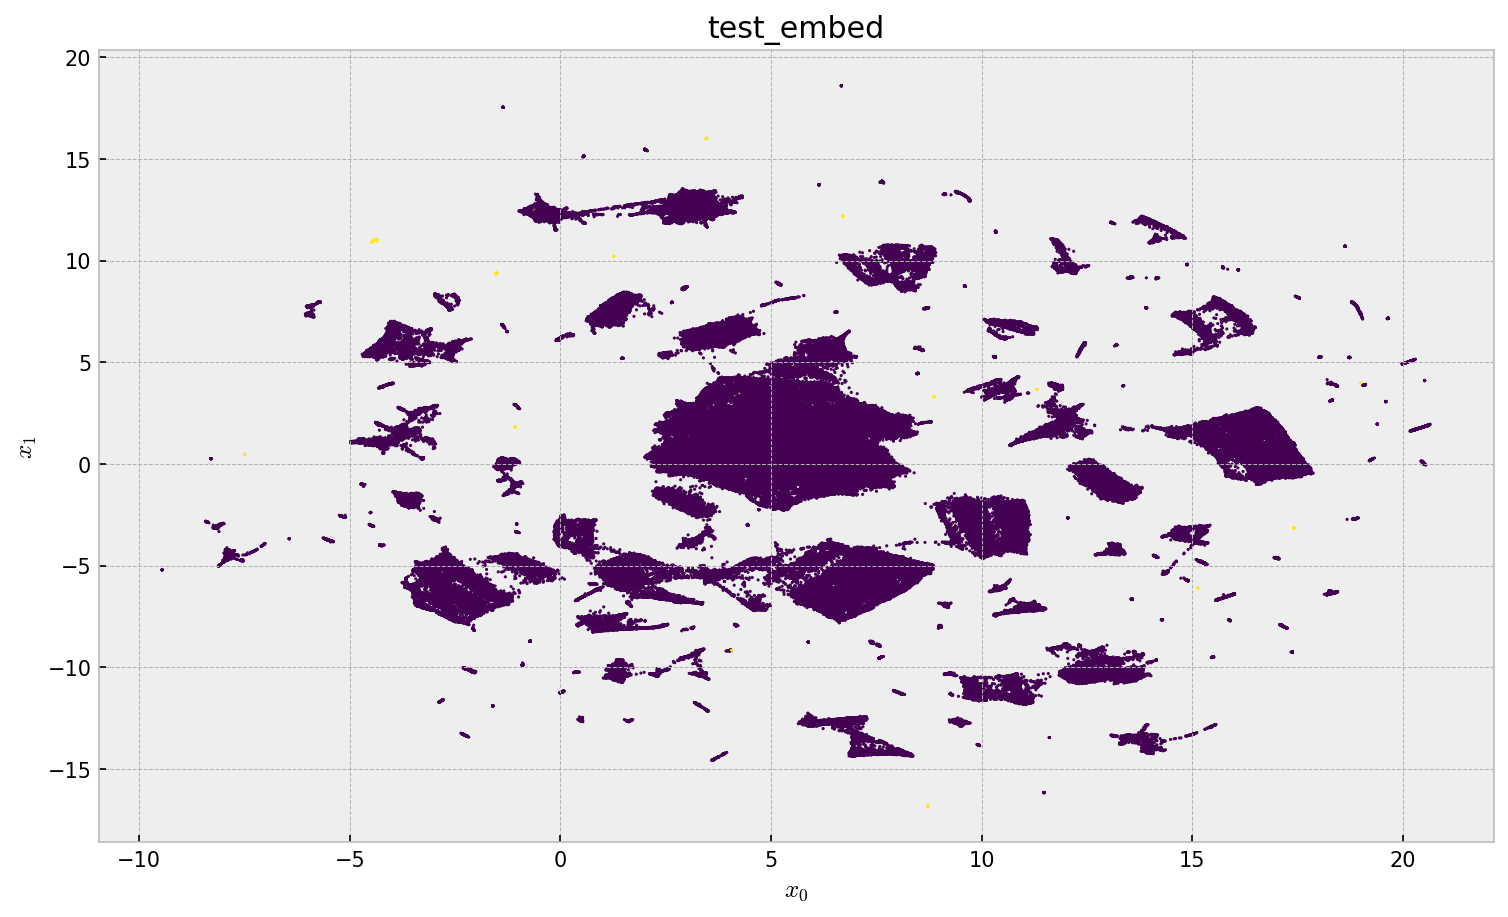

In [35]:
plt.figure(figsize=(12,7), dpi=150)
cmap = plt.get_cmap("viridis")
plt.scatter(*train_embed.T, s=1, c=y, cmap=cmap)
plt.title('train_embed')
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
plt.show()

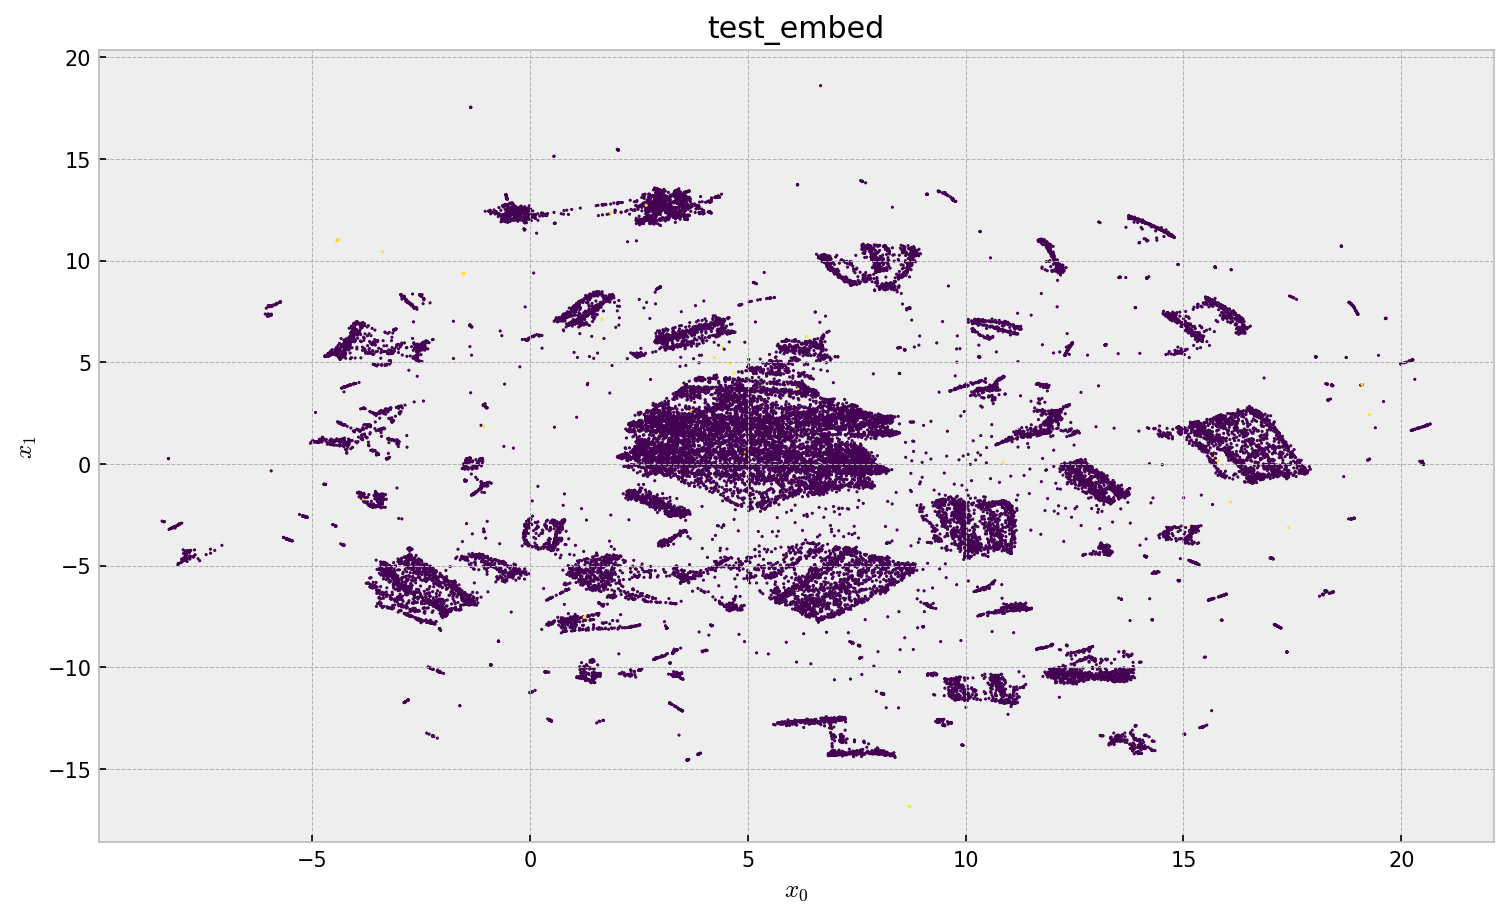

In [37]:
plt.figure(figsize=(12,7), dpi=150)
cmap = plt.get_cmap("viridis")
plt.scatter(*test_embed.T, s=1, c=testing.Class, cmap=cmap)
plt.title('test_embed')
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
plt.show()

### Very similar and we will use embedding features to train logical regression model